In [53]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification,make_moons,make_circles
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [54]:
seed=42
torch.cuda.manual_seed_all(seed=seed)

In [55]:
# X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=seed,class_sep=3)


In [56]:
# X, y = make_moons(n_samples=500,random_state=seed,noise=0.25)


In [57]:
X, y = make_circles(n_samples=500,random_state=seed,noise=0.02
                    )


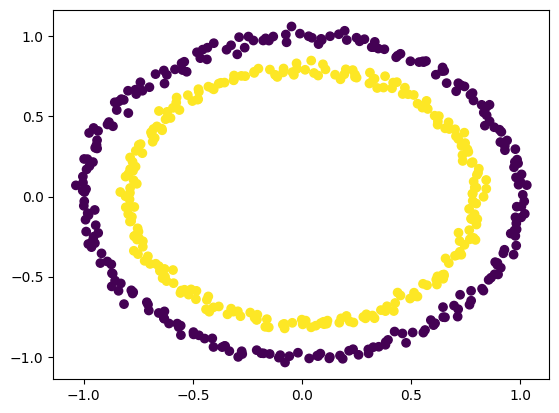

In [58]:
plt.scatter(X[:,0],X[:,1],c=y)

In [59]:
X=torch.tensor(X,dtype=torch.float,device='cuda')
y=torch.tensor(y,dtype=torch.float,device='cuda').reshape(-1,1)

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed)

In [61]:
class Classification(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer=nn.Sequential(
            nn.Linear(in_features=2,out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16,out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16,out_features=1),
            nn.Sigmoid()
        )
        

    def forward(self,x):
          return self.layer(x)

       
 

In [62]:
model = Classification().to("cuda")

In [63]:
loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(params=model.parameters(),lr=0.1)

In [ ]:
epochs=100
loss_list=[]
val_loss_list=[]
accuracy_list=[]
for i in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = loss_fn(y_pred,y_train)

    loss_list.append(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        y_pred=model(X_test)

        loss = loss_fn(y_pred,y_test)
        val_loss_list.append(loss.item())

    if i %10==0:
        print(loss)    


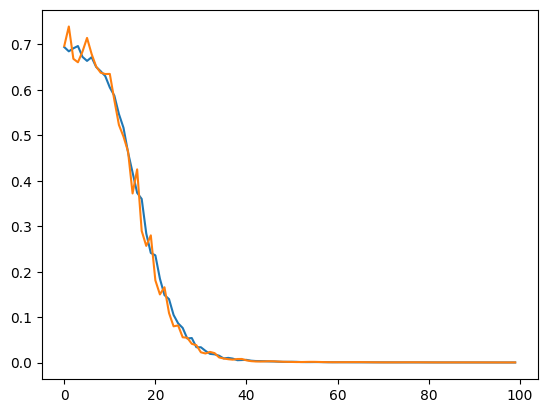

In [65]:
plt.plot(loss_list)
plt.plot(val_loss_list)

In [66]:
model.eval()
with torch.inference_mode():
    y_pred=model(X_test)

In [67]:
y_pred=torch.where(y_pred >0.5 ,1,0)

In [68]:
from helper_function import plot_decision_boundary 

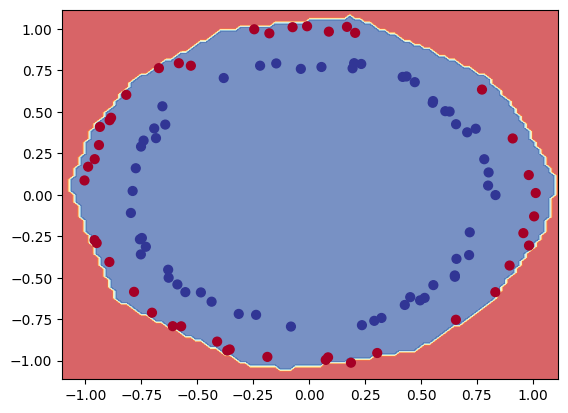

In [69]:
plot_decision_boundary(model,X_test,y_test)